In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [124]:
df = pd.read_csv("outputs/tally_decrypt_12422.csv", on_bad_lines="skip") # sometimes they overwrite...
df = df.groupby(by=["num_voters", "num_questions", "num_choices"]).mean().reset_index()
df["decrypt_time_scaled"] = df.decrypt_time * df.num_voters
print(len(df))

731


In [128]:
def get_fit_line(x_data, y_data):
    coeffs = np.polyfit(x_data, y_data, 1)
    name = f"{coeffs[0]:0.3f}x + {coeffs[1]:0.3f}"
    x_line = np.linspace(1,max(x_data), len(x_data))
    line = np.poly1d(coeffs)
    y_line = line(x_line)
    return x_line, y_line, name

def winnow_df(df, num_questions, num_choices, stat):
    df = df[(df.num_questions == num_questions) & (df.num_choices == num_choices)]
    x_line, y_line, name = get_fit_line(df.num_voters, df[stat])
    return df.num_voters, df[stat], x_line, y_line, name

In [132]:
xs

0          50.0
81        100.0
162       500.0
243      1000.0
324      5000.0
405     10000.0
486     50000.0
567    100000.0
648    500000.0
Name: num_voters, dtype: float64

In [133]:
ys

0       0.0144
81      0.0134
162     0.0352
243     0.0570
324     0.2596
405     0.5682
486     2.3334
567     4.9340
648    24.9930
Name: tally_time, dtype: float64

In [135]:
y_line

array([-1.08158218e-02,  3.11169275e+00,  6.23420132e+00,  9.35670989e+00,
        1.24792185e+01,  1.56017270e+01,  1.87242356e+01,  2.18467442e+01,
        2.49692527e+01])

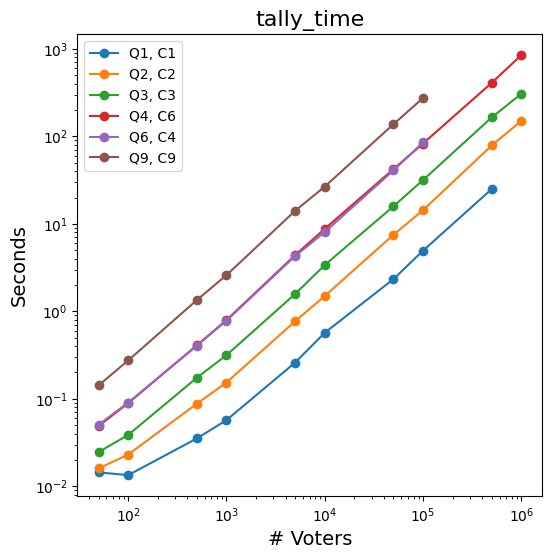

In [139]:
fig, ax = plt.subplots(figsize=(6,6))

stat = "tally_time"
# df[(df.num_voters <= 50000)].tally_time.plot()
# xs, ys, x_line, y_line, name = winnow_df(df, 3, 3, stat)
# plt.scatter(xs, ys, marker='o')
# plt.plot(x_line, y_line, label=f"3Q, 3C: {name}")
df[(df.num_questions == 1) & (df.num_choices == 1)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = 'Q1, C1',
                                                        marker='o',
                                                        ax=ax,
                                                        )
df[(df.num_questions == 2) & (df.num_choices == 2)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = 'Q2, C2',
                                                        marker='o',
                                                        ax=ax,
                                                        )
df[(df.num_questions == 3) & (df.num_choices == 3)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = 'Q3, C3',
                                                        marker='o',
                                                        ax=ax,
                                                        )
df[(df.num_questions == 4) & (df.num_choices == 6)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = 'Q4, C6',
                                                        marker='o',
                                                        ax=ax,
                                                        )
df[(df.num_questions == 6) & (df.num_choices == 4)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = 'Q6, C4',
                                                        marker='o',
                                                        ax=ax,
                                                        )
# df[(df.num_questions == 7) & (df.num_choices == 7)].plot(x = 'num_voters', 
#                                                         y = stat,
#                                                         label = 'Q7, C7',
#                                                         marker='o',
#                                                         ax=ax,
#                                                         )
df[(df.num_questions == 9) & (df.num_choices == 9)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = 'Q9, C9',
                                                        marker='o',
                                                        ax=ax,
                                                        )
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.title(stat, fontsize=16)
plt.xlabel("# Voters", fontsize=14)
plt.ylabel("Seconds", fontsize=14)
_ = plt.legend()

os.makedirs("pres_plots/", exist_ok=True)
# plt.savefig("pres_plots/tally.png", dpi=600, bbox_inches='tight')

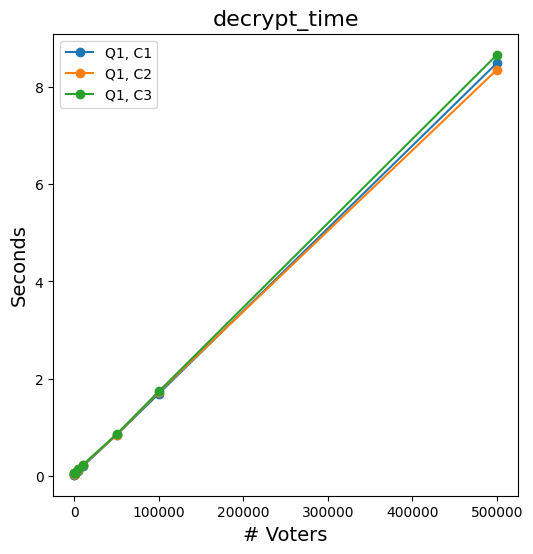

In [116]:
fig, ax = plt.subplots(figsize=(6,6))

stat = "decrypt_time"
# df[(df.num_voters <= 50000)].tally_time.plot()
Q = 1
df[(df.num_questions == Q) & (df.num_choices == 1)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = f'Q{Q}, C1',
                                                        marker='o',
                                                        ax=ax,
                                                        )
df[(df.num_questions == Q) & (df.num_choices == 2)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = f'Q{Q}, C2',
                                                        marker='o',
                                                        ax=ax,
                                                        )
df[(df.num_questions == Q) & (df.num_choices == 3)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = f'Q{Q}, C3',
                                                        marker='o',
                                                        ax=ax,
                                                        )
# df[(df.num_questions == Q) & (df.num_choices == 6)].plot(x = 'num_voters', 
#                                                         y = stat,
#                                                         label = f'Q{Q}, C6',
#                                                         marker='o',
#                                                         ax=ax,
#                                                         )
# df[(df.num_questions == Q) & (df.num_choices == 4)].plot(x = 'num_voters', 
#                                                         y = stat,
#                                                         label = f'Q{Q}, C4',
#                                                         marker='o',
#                                                         ax=ax,
#                                                         )
# df[(df.num_questions == Q) & (df.num_choices == 7)].plot(x = 'num_voters', 
#                                                         y = stat,
#                                                         label = f'Q{Q}, C7',
#                                                         marker='o',
#                                                         ax=ax,
#                                                         )
# df[(df.num_questions == Q) & (df.num_choices == 9)].plot(x = 'num_voters', 
#                                                         y = stat,
#                                                         label = f'Q{Q}, C9',
#                                                         marker='o',
#                                                         ax=ax,
#                                                         )
# plt.gca().set_xscale('log')
# plt.gca().set_yscale('log')
plt.title(stat, fontsize=16)
plt.xlabel("# Voters", fontsize=14)
plt.ylabel("Seconds", fontsize=14)
_ = plt.legend()

os.makedirs("pres_plots/", exist_ok=True)
# plt.savefig("pres_plots/tally.png", dpi=600, bbox_inches='tight')

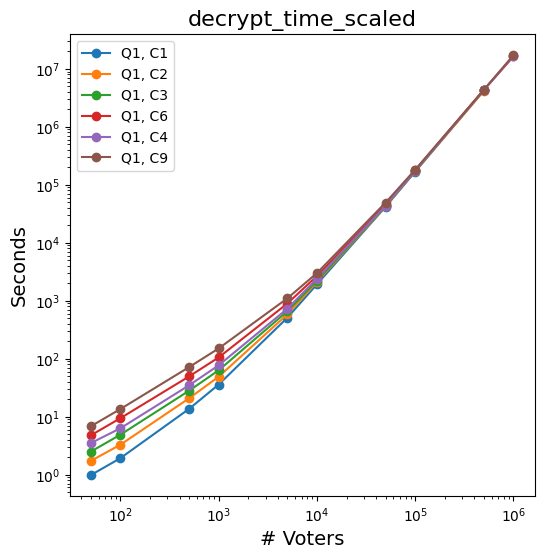

In [114]:
fig, ax = plt.subplots(figsize=(6,6))

stat = "decrypt_time_scaled"
# df[(df.num_voters <= 50000)].tally_time.plot()
Q = 1
df[(df.num_questions == Q) & (df.num_choices == 1)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = f'Q{Q}, C1',
                                                        marker='o',
                                                        ax=ax,
                                                        )
df[(df.num_questions == Q) & (df.num_choices == 2)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = f'Q{Q}, C2',
                                                        marker='o',
                                                        ax=ax,
                                                        )
df[(df.num_questions == Q) & (df.num_choices == 3)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = f'Q{Q}, C3',
                                                        marker='o',
                                                        ax=ax,
                                                        )
df[(df.num_questions == Q) & (df.num_choices == 6)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = f'Q{Q}, C6',
                                                        marker='o',
                                                        ax=ax,
                                                        )
df[(df.num_questions == Q) & (df.num_choices == 4)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = f'Q{Q}, C4',
                                                        marker='o',
                                                        ax=ax,
                                                        )
# df[(df.num_questions == Q) & (df.num_choices == 7)].plot(x = 'num_voters', 
#                                                         y = stat,
#                                                         label = f'Q{Q}, C7',
#                                                         marker='o',
#                                                         ax=ax,
#                                                         )
df[(df.num_questions == Q) & (df.num_choices == 9)].plot(x = 'num_voters', 
                                                        y = stat,
                                                        label = f'Q{Q}, C9',
                                                        marker='o',
                                                        ax=ax,
                                                        )
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.title(stat, fontsize=16)
plt.xlabel("# Voters", fontsize=14)
plt.ylabel("Seconds", fontsize=14)
_ = plt.legend()

os.makedirs("pres_plots/", exist_ok=True)
# plt.savefig("pres_plots/tally.png", dpi=600, bbox_inches='tight')

In [36]:
df[(df.num_voters <= 50000) & (df.num_questions == 9) & (df.num_choices == 9)]

,num_voters,num_questions,num_choices,tally_time,decrypt_time
70,50.0,9.0,9.0,0.142300,1.129950
151,100.0,9.0,9.0,0.274200,1.131850
232,500.0,9.0,9.0,1.345700,1.174600
313,1000.0,9.0,9.0,2.588700,1.156500
394,5000.0,9.0,9.0,14.096150,1.295500
475,10000.0,9.0,9.0,26.640444,1.323556
556,50000.0,9.0,9.0,137.584550,2.032500


In [38]:
df[(df.num_voters <= 50000) & (df.num_questions == 4) & (df.num_choices == 4)]

,num_voters,num_questions,num_choices,tally_time,decrypt_time
30,50.0,4.0,4.0,0.0356,0.2302
111,100.0,4.0,4.0,0.0610,0.2268
192,500.0,4.0,4.0,0.2786,0.2416
273,1000.0,4.0,4.0,0.5442,0.2462
354,5000.0,4.0,4.0,3.4138,0.3652
435,10000.0,4.0,4.0,5.8966,0.4242
516,50000.0,4.0,4.0,28.3150,1.1238


In [17]:
df[(df.num_voters <= 50000) & (df.num_questions == 5)]

,num_voters,num_questions,num_choices,tally_time,decrypt_time
36,50.0,5.0,1.0,0.01780,0.07620
37,50.0,5.0,2.0,0.02540,0.14640
38,50.0,5.0,3.0,0.03420,0.21600
39,50.0,5.0,4.0,0.04120,0.28320
40,50.0,5.0,5.0,0.04920,0.35080
...,...,...,...,...,...
526,50000.0,5.0,5.0,43.38260,1.23400
527,50000.0,5.0,6.0,50.94475,1.27675
528,50000.0,5.0,7.0,59.42675,1.34425
529,50000.0,5.0,9.0,76.10220,1.49350
